In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from subprocess import check_output

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(sorted(train.columns))

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch', 'Street'

all_data size is : (2919, 79)
              Missing Ratio
PoolQC               99.657
MiscFeature          96.403
Alley                93.217
Fence                80.439
FireplaceQu          48.647
LotFrontage          16.650
GarageQual            5.447
GarageCond            5.447
GarageFinish          5.447
GarageYrBlt           5.447
GarageType            5.379
BsmtExposure          2.809
BsmtCond              2.809
BsmtQual              2.775
BsmtFinType2          2.741
BsmtFinType1          2.706
MasVnrType            0.822
MasVnrArea            0.788
MSZoning              0.137
BsmtFullBath          0.069
BsmtHalfBath          0.069
Utilities             0.069
Functional            0.069
Electrical            0.034
BsmtUnfSF             0.034
Exterior1st           0.034
Exterior2nd           0.034
TotalBsmtSF           0.034
GarageArea            0.034
GarageCars            0.034
BsmtFinSF2            0.034
BsmtFinSF1            0.034
KitchenQual           0.034
SaleType          

c:\users\rcwor\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180921.20 and sigma = 79415.29



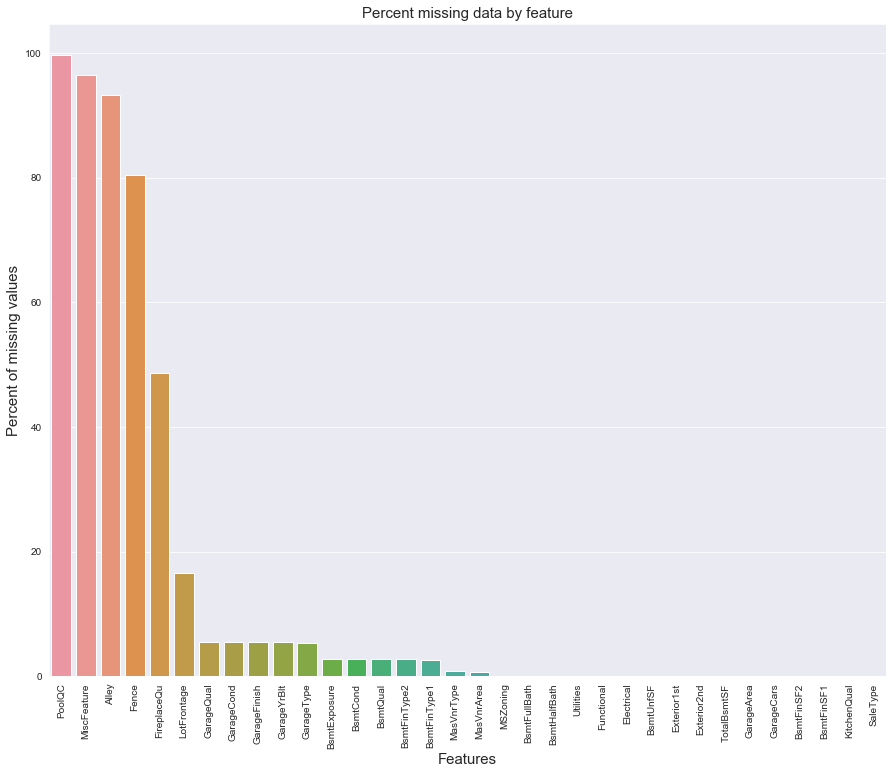

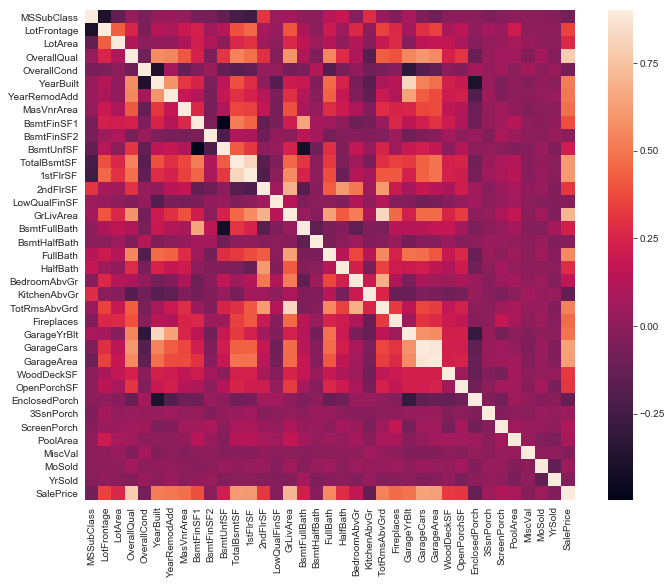

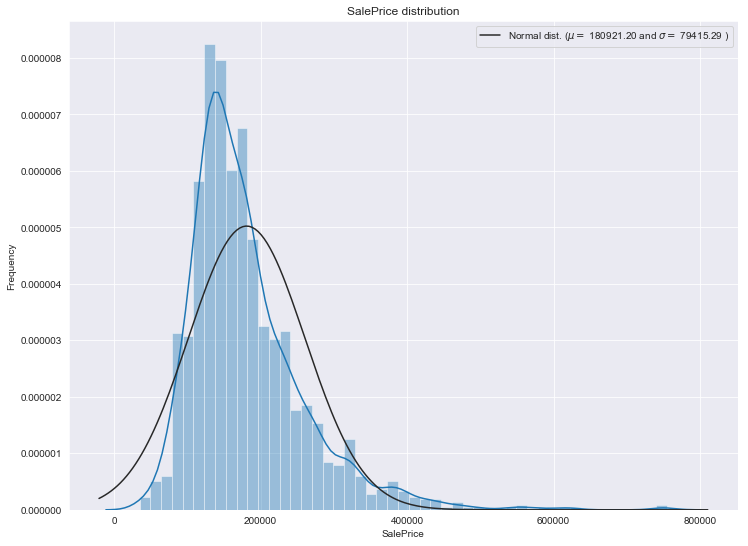

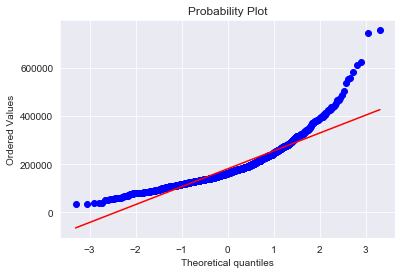

GrLivArea


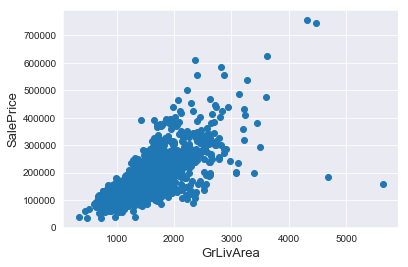

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from subprocess import check_output
from scipy.stats import norm, skew
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

class explore_data():
    def __init__(self, train, test, target):
        self.train = train
        self.test = test
        self.ntrain = len(train.index)
        self.ntest = len(test.index)
        self.train_ID = self.train.loc[:, 'Id']
        self.test_ID = self.test.loc[:, 'Id']
        self.train.drop("Id", axis = 1, inplace = True)
        self.test.drop("Id", axis = 1, inplace = True)
        self.target = target
        self.y_train = train.loc[:,self.target]
        self.y_test = train.loc[:,self.target]
    
    def data_combine(self):
        self.ntrain = self.train.shape[0]
        self.ntest = self.test.shape[0]
        #### Learn to automate var pulled out ####
        self.y_train = train.loc[:, self.target].values
        self.all_data = pd.concat((self.train, self.test)).reset_index(drop=True)
        self.y_all_data = self.all_data.loc[:, self.target]
        self.all_data.drop([self.target], axis=1, inplace=True)
        print('all_data size is : {}'.format(self.all_data.shape))
        return self
              
    def missing_data(self, numdisp=40):
        all_data_na = (self.all_data.isnull().sum() / len(self.all_data)) * 100
        all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:numdisp]
        missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
        try:
            print(missing_data.head(numdisp))
        except:
            print('Can\'t display this much missing data')
        f, ax = plt.subplots(figsize=(15, 12))
        plt.xticks(rotation='90')
        sns.barplot(x=all_data_na.index, y=all_data_na)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
        return self
        
        
    def plot_single_relation(self, var):
        """
        Use this function to plot single regression relationship, use of you know
        correlation between var and target is high, can be used to identify easy 
        outliers in the data. 
        """
        fig, ax = plt.subplots()
        ax.scatter(x=self.train.loc[:,var], y=self.y_train)
        plt.ylabel(self.target, fontsize=13)
        plt.xlabel(var, fontsize=13)
        plt.show()
    
    def fit_norm(self, var):
        plt.subplots(figsize=(12,9))
        sns.distplot(self.train.loc[:, var], fit=norm);
        # Get the fitted parameters used by the function
        (mu, sigma) = norm.fit(self.train.loc[:, var])
        print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
        
        #Now plot the distribution
        plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
        plt.ylabel('Frequency')
        plt.title('SalePrice distribution')
        
        #Get also the QQ-plot
        fig = plt.figure()
        res = stats.probplot(self.train[var], plot=plt)
        plt.show()
    
    def mass_correlation(self):
        corrmat = train.corr()
        plt.subplots(figsize=(12,9))
        sns.heatmap(corrmat, vmax=.9, square=True)
    
    def visualize_data(self, relation=None):
        self.data_combine()
        self.missing_data()
        self.mass_correlation()
        self.fit_norm(self.target)
        if relation:
            if isinstance(relation, str):
                self.plot_single_relation(relation)
            else:
                for rel in tuple(relation):
                    self.plot_single_relation(rel)
                
    
    
class modify_data(explore_data):
    def __init__(self, train, test, target):
        self.train = train
        self.test = test
        super().__init__(train, test, target)
        
    def remove_outliers(self):
        train = self.train.drop(self.train[(self.train.loc[:,'GrLivArea']>4000) & (self.train.loc[:,'SalePrice']<300000)].index)
        return self
        
    def log1p_tranform(self, var):
        #We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
        self.train.loc[:, var] = np.log1p(self.train[var])
        #Check the new distribution 
        self.fit_norm(var)
        return self
              
    def fill_na(self, cols, fill="None"):
        cols = list(cols)
        self.all_data.loc[:, cols] = all_data.loc[:, cols].fillna(fill)
        return self
    
    def fill_na_value_stat(self, cols, key=None):
        if key is "mean":
            pass
        elif key is "median":
            self.all_data[cols[0]] = self.all_data.groupby(col[1])[col[0]].transform(lambda x: x.fillna(x.median()))
        elif key is "mode":
            self.all_data[cols[0]] = self.all_data.groupby(col[1])[col[0]].transform(lambda x: x.fillna(x.mode()))
        else: 
            print("Cannot fill in values due to improper key {}".format(key))
            pass
        return self
    
    def change_type(self, cols, tp):
        self.all_data.loc[:, cols] = self.all_data.loc[:, cols].apply(tp) 
        return self
        
    def label_encode(self, cols):
        for c in cols:
            lbl = LabelEncoder()
            lbl.fit(list(self.all_data.loc[:, c].values))
            self.all_data.loc[:, c] = lbl.transform(list(self.all_data.loc[:, c].values))
        return self
    
    def add_feature_combination(self, features, new_feat):
        for feat in features:
            if x:
                x += self.all_data.loc[:, feat]
            else:
                x = self.all_data.loc[:, feat]
        self.all_data[:, new_feat] = x
        print(x.head())
        return self
    
    def check_skewness(self):
        self.numeric_feats = all_data.data.dtypes[all_data.dtypes != "object"].index
        skewed_feats = self.all_data.loc[:, numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
        print("\nSkew in numerical features: \n")
        self.skewness = pd.DataFrame({'Skew' : skewed_feats})
        print(skewness.head(10))
        return self
    
    def correct_positive_skewness(self, threshold=.75, lambda=.15):
        skewness = self.skewness[self.skewness > threshold]
        print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
        skewed_features = list(skewness.index)
        for i, feat in enumerate(skewed_features):
            old_skew = skewness.iloc[i] 
            self.all_data.loc[:, feat] = boxcox1p(self.all_data.loc[:, feat], lam)
            new_skew = self.all_data.loc[:, feat].apply(lambda x: skew(x.dropna()))
            print('Skew of {} for feature {} improved to {} through boxcox trainformation'.format(old_skew, feat, new_skew))
        return self
    
    def get_dummies(self):
        print(self.all_data.head())
        size_before = self.all_data.shape
        self.all_data = pd.get_dummies(self.all_data)
        size_after = self.all_data.shape
        print(self.all_data.head())
        print('Size Before Dummies: {} \n Size After Dummies: {}'.format(size_before, size_after))
        return self
    
    
    def resplit_data(self): 
        train = all_data[:self.ntrain]
        test = all_data[self.ntrain]
        return train, test    
    
# Main 
ob = modify_data(train, test, 'SalePrice')
ob.visualize_data(relation='GrLivArea')
              
fillnone = (
            'PoolQC', 
            'MiscFeature', 
            'Alley', 
            'Fence', 
            'FireplaceQu', 
            'GarageType', 
            'GarageFinish', 
            'GarageQual', 
            'GarageCond',
            'BsmtQual',
            'BsmtCond',
            'BsmtExposure',
            'BsmtFinType1',
            'BsmtFinType2',
            'MSSubClass'
           )
    
            
fill_0 = (
          'GarageYrBlt',
          'GarageArea',
          'GarageCars',
          'BsmtFinSF1',
          'BsmtFinSF2',
          'BsmtUnfSF',
          'TotalBsmSF',
          'BsmtFullBath',
          'BsmtHalfBath',
          'MasVnrType',
          'MasVnrArea',
          )

fillmed = ('LotFrontage', 'Neighborhood')
            
fillmode = ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType')

drop = ('Utilities')

typ = ('Functional')

string = ('MSSubClass', 'OverallCond', 'YrSold')

label = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [ ]:
ob.remove_outliers()
ob.fill_na(fillnone)
ob.fill_na(fill_0, fill=0)
ob.fill_na(typ, fill='typ')
ob.drop()
ob.fill_na_value(fillmed, key='median')
ob.fill_na_value(fillmode, key='mode')
ob.change_type(string, tp)
ob.add_feature_combination(('TotalBsmtSF', '1stFlrSF', '2ndFlrSF'), 'TotalSF')


In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

